📊 Dataset Preview:
  Team  Season  Team_Runs  Team_Wickets  Batting_Average  Strike_Rate  \
0   RR    2021        124             4        35.500121   152.038488   
1  CSK    2020        219             8        25.542072   164.585126   
2  KKR    2019        219             6        43.336900   153.469807   
3  KKR    2023        140             6        24.050989   131.936209   
4   RR    2023        215             4        30.526285   136.364033   

   Match_Won  Attendance  Ticket_Price  Ticket_Revenue  
0          1       21838           724        15810712  
1          1       72210          1336        96472560  
2          1       26110           519        13551090  
3          1       22177          1717        38077909  
4          1       28054          1489        41772406  

📈 Team Performance Summary:
  Team   Team_Runs  Batting_Average  Strike_Rate  Match_Won  Ticket_Revenue  \
0  CSK  168.962121        34.378089   142.377042   0.575758    7.717869e+07   
1  KKR  168.8

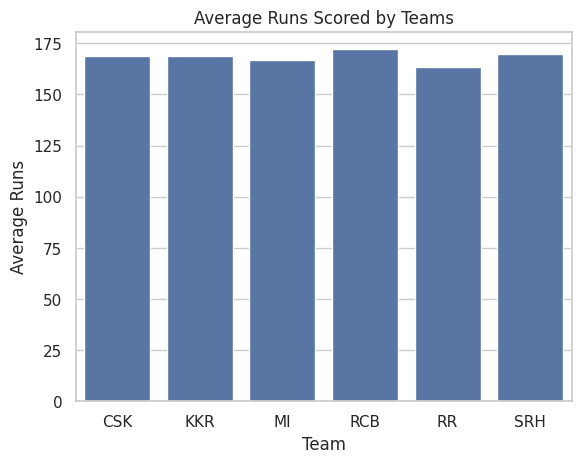

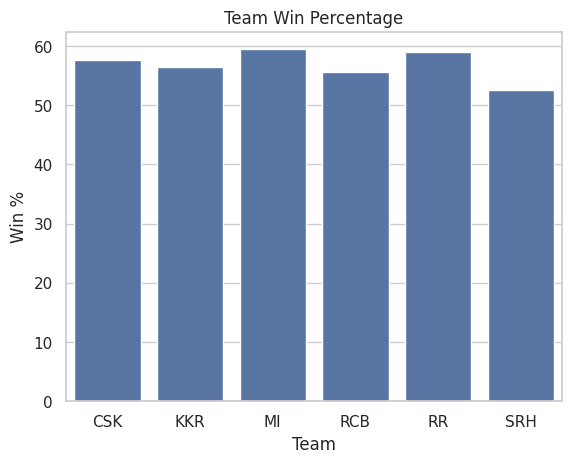

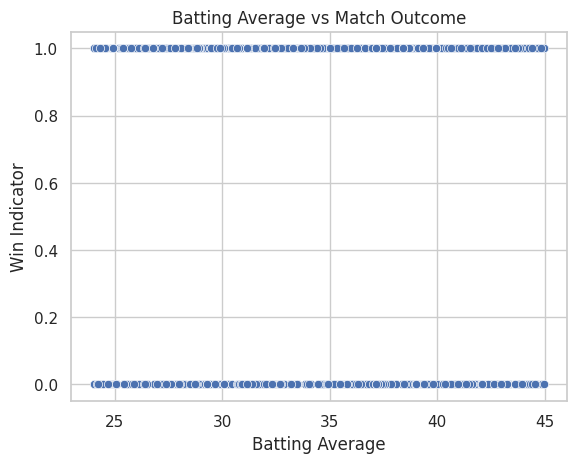

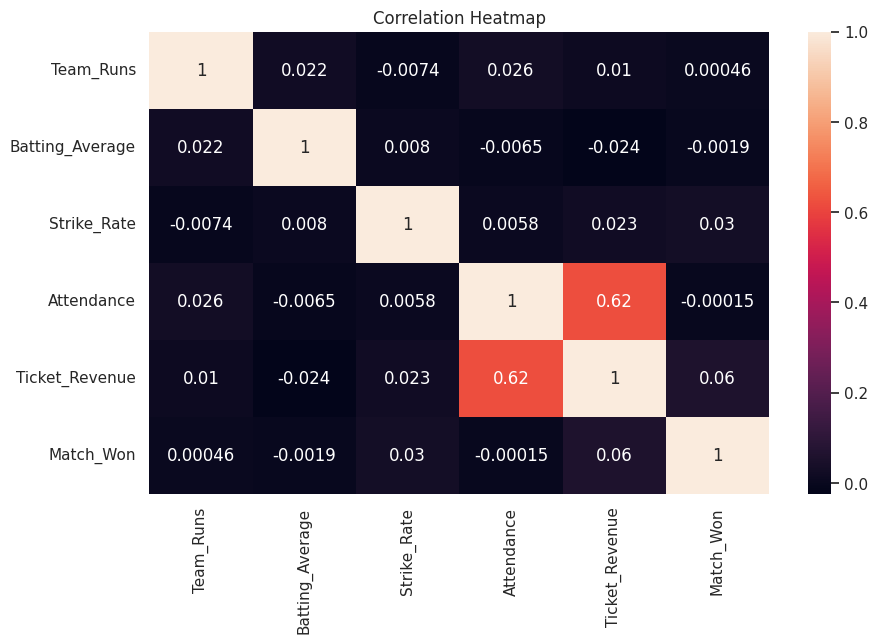

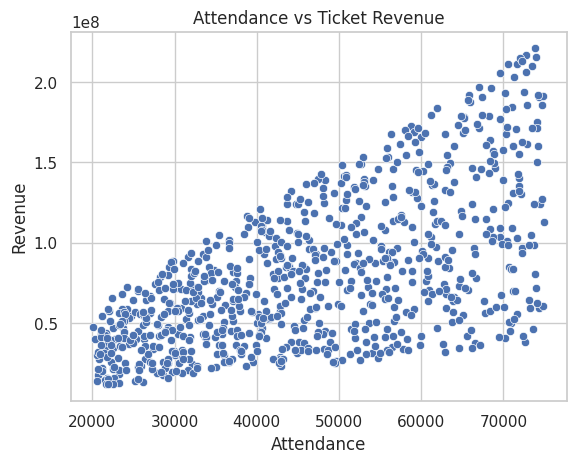

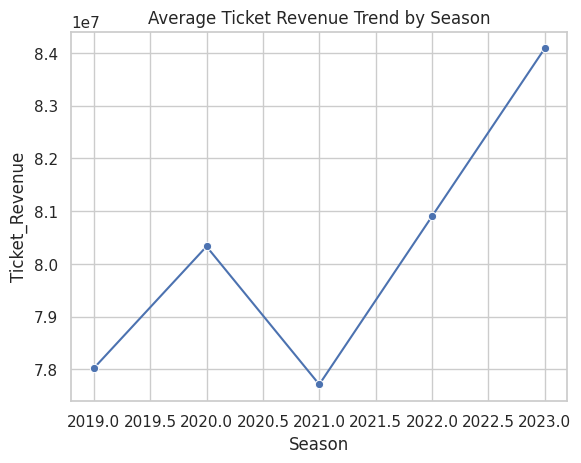

In [1]:
# ------------------------------------------------------------------
# Practical no 10 MINI PROJECT: Sports Visualization & Reporting
# ------------------------------------------------------------------

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ------------------------------------------------------------------
# Step 1: Create a large sports dataset (800+ records)
# ------------------------------------------------------------------

np.random.seed(7)

teams = ["MI", "CSK", "RCB", "KKR", "RR", "SRH"]
seasons = [2019, 2020, 2021, 2022, 2023]

records = 820

data = {
    "Team": np.random.choice(teams, records),
    "Season": np.random.choice(seasons, records),
    "Team_Runs": np.random.randint(120, 220, records),
    "Team_Wickets": np.random.randint(4, 10, records),
    "Batting_Average": np.random.uniform(24, 45, records),
    "Strike_Rate": np.random.uniform(120, 165, records),
    "Match_Won": np.random.choice([0, 1], records, p=[0.45, 0.55]),
    "Attendance": np.random.randint(20000, 75000, records),
    "Ticket_Price": np.random.randint(500, 3000, records)
}

df = pd.DataFrame(data)

# Revenue calculation
df["Ticket_Revenue"] = df["Attendance"] * df["Ticket_Price"]

print("📊 Dataset Preview:")
print(df.head())

# ------------------------------------------------------------------
# Step 2: Team Performance Analysis
# ------------------------------------------------------------------

team_perf = df.groupby("Team").agg({
    "Team_Runs": "mean",
    "Batting_Average": "mean",
    "Strike_Rate": "mean",
    "Match_Won": "mean",
    "Ticket_Revenue": "mean"
}).reset_index()

team_perf["Win_Percentage"] = team_perf["Match_Won"] * 100

print("\n📈 Team Performance Summary:")
print(team_perf)

# ------------------------------------------------------------------
# Step 3: Visualization – Team Performance
# ------------------------------------------------------------------

# Average Runs by Team
plt.figure()
sns.barplot(data=team_perf, x="Team", y="Team_Runs")
plt.title("Average Runs Scored by Teams")
plt.ylabel("Average Runs")
plt.show()

# Win Percentage by Team
plt.figure()
sns.barplot(data=team_perf, x="Team", y="Win_Percentage")
plt.title("Team Win Percentage")
plt.ylabel("Win %")
plt.show()

# ------------------------------------------------------------------
# Step 4: Batting Metrics Impact on Winning
# ------------------------------------------------------------------

plt.figure()
sns.scatterplot(
    data=df,
    x="Batting_Average",
    y="Win_Percentage" if "Win_Percentage" in df else "Match_Won"
)
plt.title("Batting Average vs Match Outcome")
plt.xlabel("Batting Average")
plt.ylabel("Win Indicator")
plt.show()

# Correlation Analysis
corr = df[[
    "Team_Runs",
    "Batting_Average",
    "Strike_Rate",
    "Attendance",
    "Ticket_Revenue",
    "Match_Won"
]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

# ------------------------------------------------------------------
# Step 5: Revenue & Attendance Analysis
# ------------------------------------------------------------------

plt.figure()
sns.scatterplot(data=df, x="Attendance", y="Ticket_Revenue")
plt.title("Attendance vs Ticket Revenue")
plt.xlabel("Attendance")
plt.ylabel("Revenue")
plt.show()

# Season-wise revenue trend
season_revenue = df.groupby("Season")["Ticket_Revenue"].mean().reset_index()

plt.figure()
sns.lineplot(data=season_revenue, x="Season", y="Ticket_Revenue", marker="o")
plt.title("Average Ticket Revenue Trend by Season")
plt.show()
